In [14]:
from ms_data_funcs import *
from transformer_funcs import *

import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [15]:
if torch.cuda.is_available():
    print("CUDA is available.")
    print("PyTorch version:", torch.__version__)
    print("CUDA version:", torch.version.cuda)
    print("Number of available GPUs:", torch.cuda.device_count())
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")

CUDA is available.
PyTorch version: 2.0.1+cu118
CUDA version: 11.8
Number of available GPUs: 1
GPU name: NVIDIA GeForce RTX 3080


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [17]:
df = pd.read_csv('data/MoNA/in-silico-SMILES.csv') 
print(f"Train shape: {df.shape}")

/tmp/ipykernel_29847/4094128230.py:1: DtypeWarning: Columns (7,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MoNA/in-silico-SMILES.csv')


Train shape: (1837926, 18)


In [18]:
df_test = pd.read_csv('data/MoNA/experimental-SMILES.csv')
print(f"Test shape: {df_test.shape}")

Test shape: (213326, 17)


/tmp/ipykernel_29847/3036516358.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('data/MoNA/experimental-SMILES.csv')


In [19]:
# Minimal test
n = 50000
df = df.sample(n)
df_test = df_test.sample(n//2)

In [20]:
method='direct'

In [21]:
max_mz = calculate_max_mz(df)

In [22]:
df['molecular_formula'].unique().shape

(10579,)

In [23]:
smiles_vocabs = get_or_create_smiles_vocabs(df)

Loading existing character vocabulary...
SMILES vocabulary size (character): 32
Loading existing atom_wise vocabulary...
SMILES vocabulary size (atom_wise): 12
Loading existing substructure vocabulary...
SMILES vocabulary size (substructure): 38759


In [24]:
results = {}
print(f"\nSpectra tokenized with {method} tokenization:")
print(f"\nSMILES tokenized with {'character'} tokenization")
smiles_vocab = smiles_vocabs['character']

train_loader, test_loader = load_tokenized_data_with_smiles(df, df_test, 
                                                            method, 
                                                            smiles_vocab, 
                                                            max_mz=max_mz)

#num_classes = len(label_encoder.classes_)
smiles_vocab_size = len(smiles_vocab)

# sample batch used for input dimensions
sample_batch, target_batch = next(iter(train_loader))
print("Spectra shape:", sample_batch.shape)
print("SMILES shape:", target_batch.shape)
embed_depth = sample_batch.shape[3]


Spectra tokenized with direct tokenization:

SMILES tokenized with character tokenization
Spectra shape: torch.Size([32, 1, 126, 16])
SMILES shape: torch.Size([32, 145])


In [25]:
model = MS_VIT_Seq2Seq(
    smiles_vocab_size=len(smiles_vocab),
    embed_depth=embed_depth,
    d_model=64,           # Reduced from 256
    nhead=4,              # Reduced from 8
    num_layers=2,         # Reduced from 6
    dim_feedforward=256,  # Reduced from 2048
    dropout=0.1,
    num_classes=None
)

In [26]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion_seq = nn.CrossEntropyLoss()#ignore_index=smiles_vocab['<pad>'])

model, history = train_model_seq2seq(model, train_loader, test_loader, 
                                     optimizer, criterion_seq, 
                                     num_epochs=100, evaluate=True, verbose=1,
                                     checkpoint_path="./model_checkpoints/",
                                     meta_tag=(method+"_character"),
                                     use_tensorboard=True)

TensorBoard logs will be saved to runs/20240726-134626
Saving checkpoints to ./model_checkpoints/checkpoint_1


Epoch 1/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 2/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 3/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 4/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 5/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 6/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 7/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 8/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 9/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 10/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 11/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 12/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 13/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 14/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 15/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 16/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 17/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 18/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 19/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 20/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 21/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 22/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 23/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 24/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 25/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 26/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 27/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 28/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 29/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 30/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 31/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 32/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 33/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 34/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 35/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 36/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 37/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 38/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 39/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 40/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 41/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 42/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 43/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 44/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 45/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 46/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 47/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 48/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 49/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 50/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 51/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 52/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 53/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 54/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 55/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 56/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 57/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 58/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 59/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 60/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 61/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 62/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 63/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 64/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 65/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 66/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 67/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 68/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 69/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 70/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 71/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 72/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 73/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 74/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 75/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 76/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 77/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 78/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 79/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 80/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 81/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 82/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 83/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 84/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 85/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 86/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 87/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 88/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 89/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 90/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 91/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 92/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 93/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 94/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 95/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 96/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 97/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 98/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 99/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 100/100 [Train]:   0%|          | 0/1563 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/782 [00:00<?, ?it/s]

In [27]:
results = evaluate_model_seq2seq(model, test_loader, smiles_vocab, test=True)

Sequence Accuracy: 0.9922
Average Sequence Loss: 0.3642
Valid SMILES Percentage: 89.90%
Average Tanimoto Similarity: 0.9862
Average Dice Similarity: 0.9913
Average Edit Distance: 3.92

True SMILES: O=C(OC1CC2N(C)C(CC2)C1)C(C=3C=CC=CC3)CO
Pred SMILES: O=C(OC1CC2N(C)C(CC2)C1)C(C=3C=CC=CC3)CO

True SMILES: O=C(O)C(NC(=O)CCC(NC(=O)C(NC(=O)C(OC1C(OC2OC(CO)C(O)C(O)C2NC(=O)C)C(OC(O)C1NC(=O)C)CO)C)C)C(=O)N)CCCC(NC(=O)C(NC(=O)CCC(NC(=O)C(NC(=O)C(OC3C(OC4OC(CO)C(O)C(O)C4NC(=O)C)C(OC(O)C3NC(=O)C)CO)C)C)C(=O)N)CCCC(N)C(=O)N)C(=O)N
Pred SMILES: O=C(O)C(NC(=O)CCC(NC(=O)C(NC(=O)C(OC1C(OC2OC(CO)C(O)C(O)C2NC(=O)C)C(OC(O)C1NC(=O)C)CO)C)C)C(=O)N)CCCC(NC(=O)C(NC(=O)CCC(NC(=O)C(NC(=O)C(OC3C(OC4OC(CO)C(O)C(O)C4NC(=O)C)C(OC(O)C3NC(=O)C)CO)C)C)C(=O)N)CCCN(N)((=O)N)((=O)NC

True SMILES: O=C1C(=COC2=CC(O)=CC=C12)C=3C=CC(O)=CC3
Pred SMILES: O=C1C(=COC2=CC(O)=CC=C12)C=3C=CC(O)=CC3

True SMILES: O=C(OC1CC(O)(C(=O)O)CC(OC(=O)C=CC2=CC=C(O)C(O)=C2)C1O)C=CC3=CC=C(O)C(O)=C3
Pred SMILES: O=C(OC1CC(O)(C(=O)O)CC(OC(=O)C=C

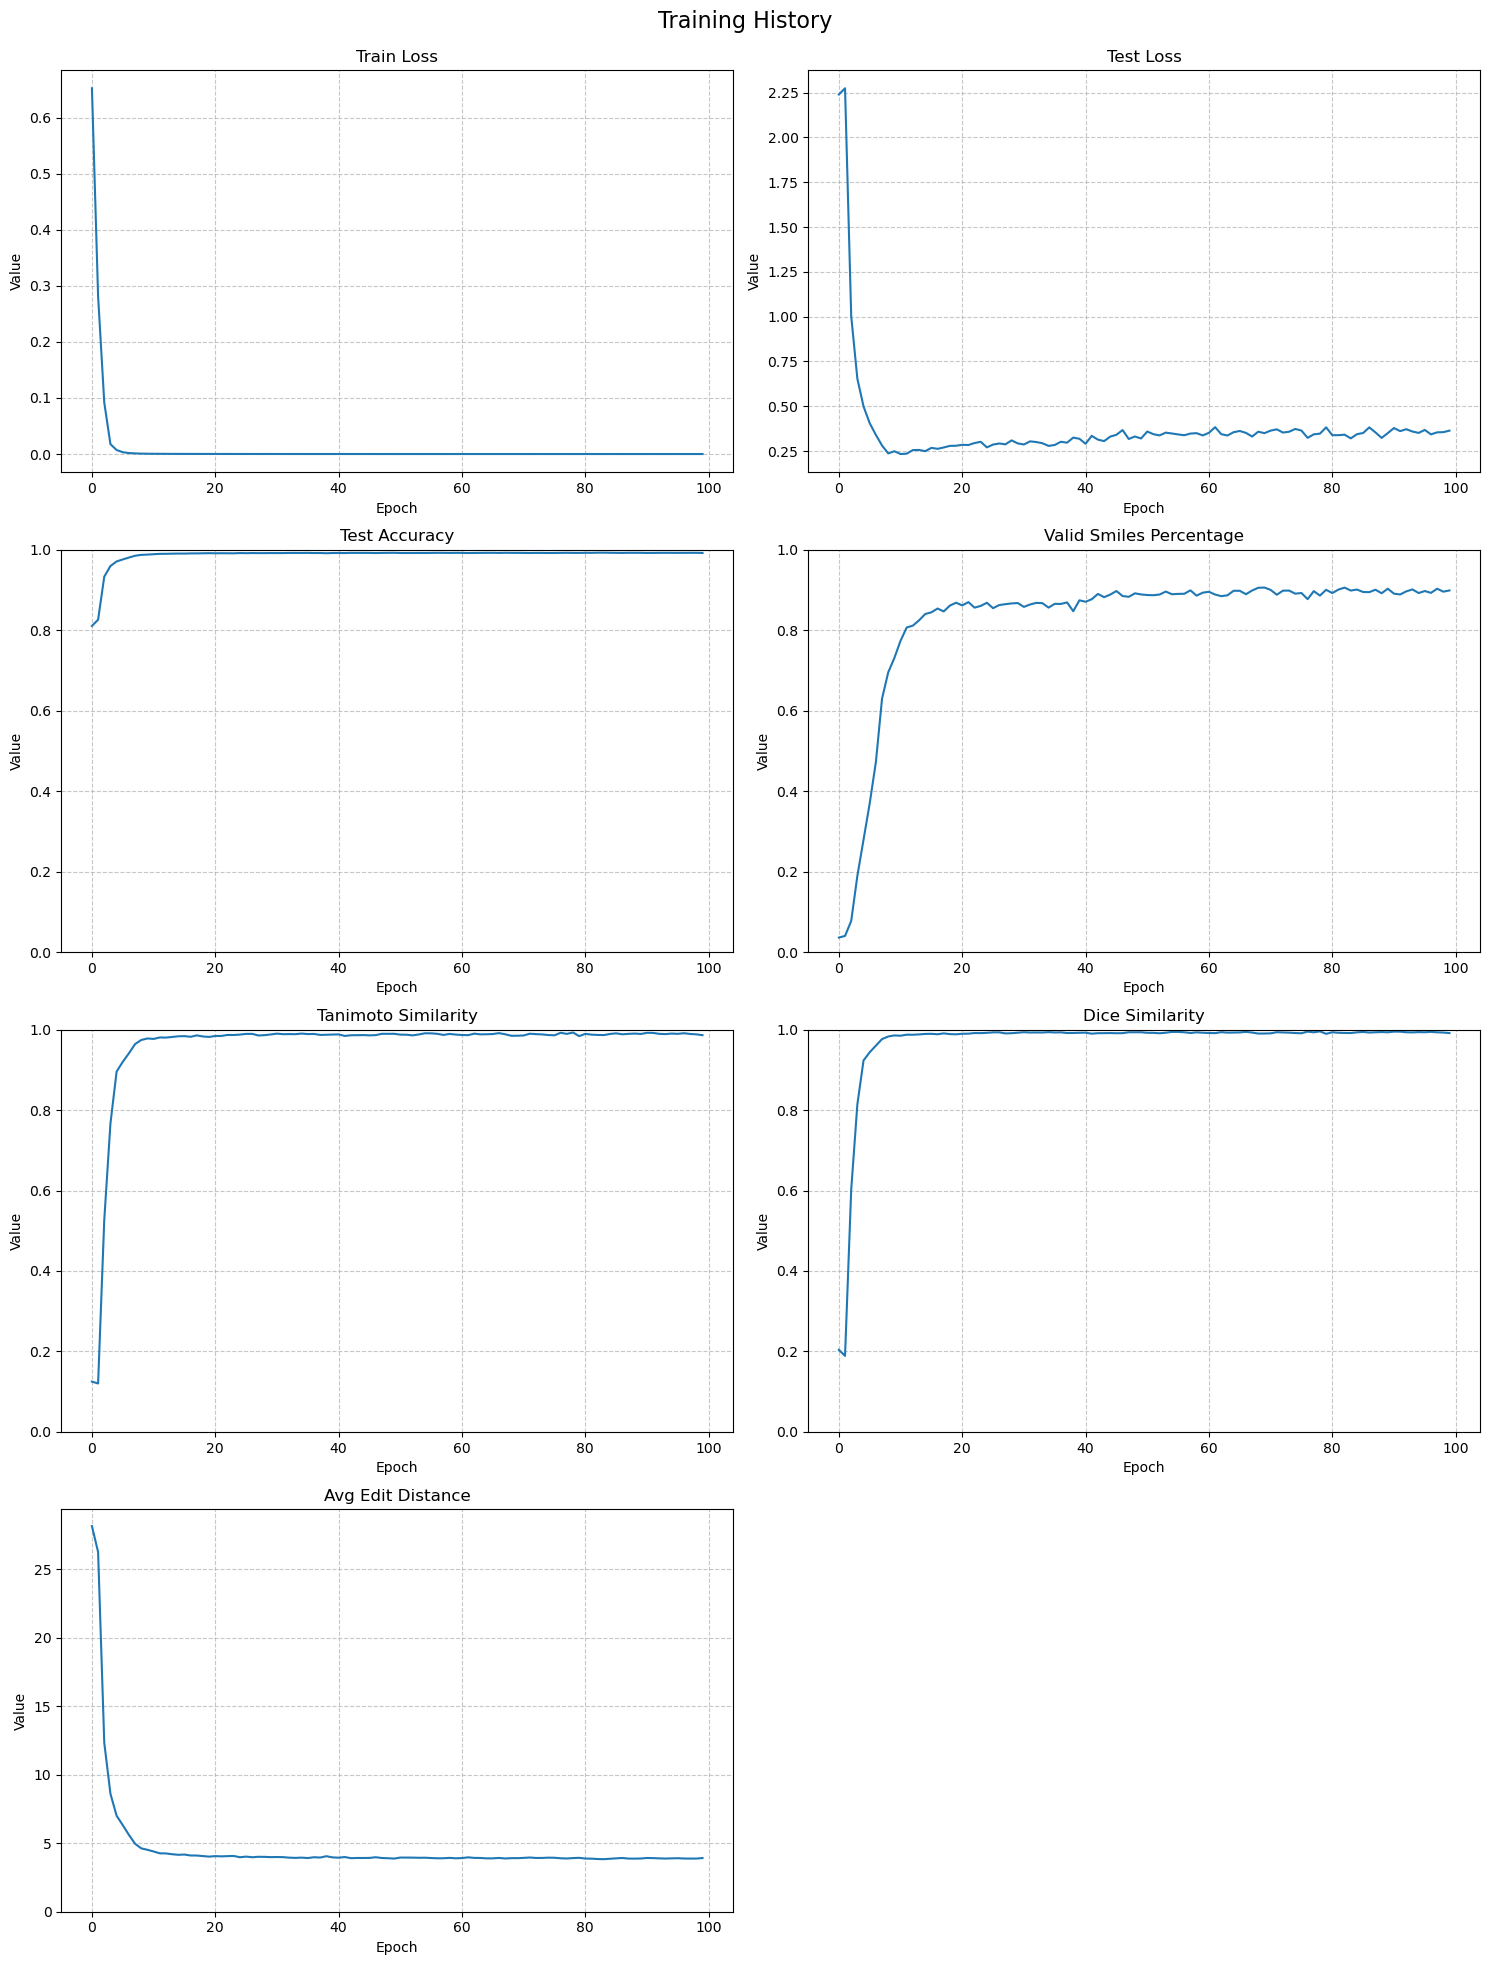

In [28]:
plot_training_history(history)